In [1]:
!pip install opendatasets
"""
get your kaggle key and kaggle username https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/
"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'\nget your kaggle key and kaggle username https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/\n'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
folder = "https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset"
import opendatasets as od
import keras
from tensorflow.keras import datasets, layers, models, optimizers
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
import warnings
warnings.filterwarnings("ignore")
od.download(folder)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chinmayaland
Your Kaggle Key: ··········


100%|██████████| 750M/750M [00:05<00:00, 156MB/s]


##Loading dataset

In [3]:
batch_size = 32
img_height = 224
img_width = 224
data_path="/content/stanford-dogs-dataset/images/Images"
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.2, 
    rescale=1./255.   
)
train_ds = datagen.flow_from_directory(
    data_path,
    target_size = (img_height,img_width),
    batch_size = 32,
    subset = 'training',
    shuffle = True,
)
val_ds = datagen.flow_from_directory(
    data_path,
    target_size = (img_height,img_width),
    batch_size = 32,
    subset = 'validation',
    shuffle = True,
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


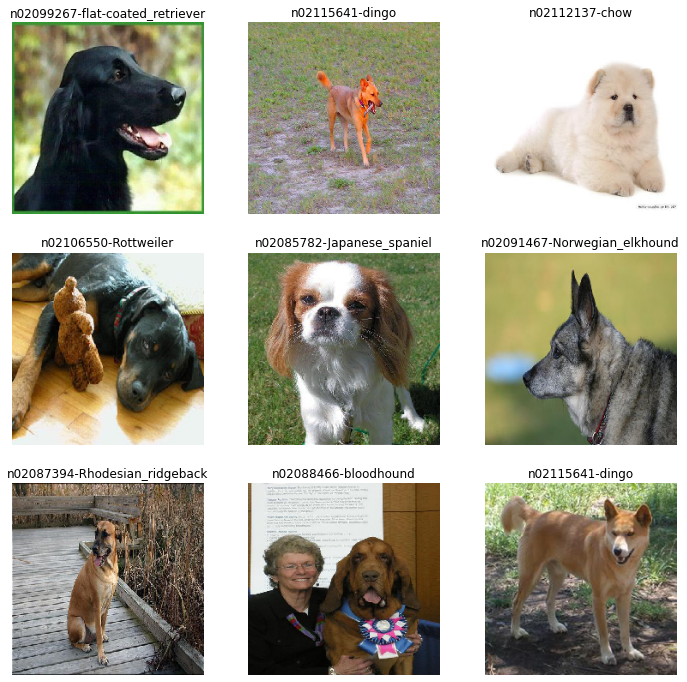

In [ ]:
import numpy as np
class_labels = list(train_ds.class_indices.keys())
plt.figure(figsize=(12, 12))
for img,label in train_ds:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[i])
    plt.title(class_labels[int(np.where(label[i]==1)[0][0])])
    plt.axis('off')
  break

###CNN Model

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
from keras.models import Sequential
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(300, activation='relu'),
  layers.Dense(240, activation='relu'),
  layers.Dense(120, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)       

In [ ]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.4 MB/s eta 0:00:00


In [ ]:
model.compile(
  optimizer='adam',
  loss="categorical_crossentropy",
  metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall(),tfa.metrics.F1Score(num_classes=120)]
)

In [ ]:
epochs = 20
history1=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


516/516 [==============================] - 170s 291ms/step - loss: 4.7835 - accuracy: 0.0116 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - f1_score: 0.0024 - val_loss: 4.6945 - val_accuracy: 0.0184 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.0015
Epoch 2/20
516/516 [==============================] - 148s 287ms/step - loss: 4.5164 - accuracy: 0.0288 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - f1_score: 0.0145 - val_loss: 4.4065 - val_accuracy: 0.0408 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.0151
Epoch 3/20
516/516 [==============================] - 151s 293ms/step - loss: 4.2787 - accuracy: 0.0471 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - f1_score: 0.0311 - val_loss: 4.2140 - val_accuracy: 0.0565 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.0298
Epoch 4/20
516/516 [==============================] - 159s 308ms/step - loss: 4.1247 - accuracy: 0.0663 - precision_2: 0.6875 - r

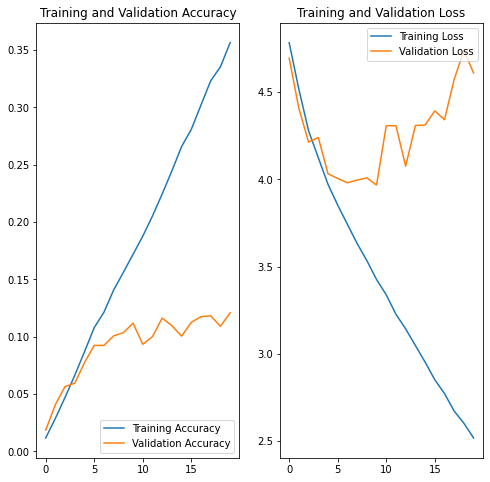

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
with open("PES1UG20CS113_history_Normal.pkl", "wb") as f:
  pickle.dump(history1.history,f)

In [ ]:
eval1=model.evaluate(val_ds)

128/128 [==============================] - 19s 145ms/step - loss: 4.6095 - accuracy: 0.1208 - precision_2: 0.2549 - recall_2: 0.0415 - f1_score: 0.1116


In [ ]:
import pandas as pd
cnn = {
    'model' : ['CNN'],
    'accuracy' : [round(max(history1.history['val_accuracy']),4)*100],
    'precession' : [round(max(history1.history['val_precision_2']),4)*100],
    'recall' : [round(max(history1.history['val_recall_2']),4)*100],
    'f1 score' : [round(history1.history['val_f1_score'][-1][-1],4)*100]
}
cnn = pd.DataFrame(cnn)

##InceptionV3 Model

In [4]:
img_width, img_height = 224, 224 
InceptionV3 = applications.InceptionV3(include_top= False, input_shape= (img_width, img_height, 3), weights= 'imagenet')
InceptionV3.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [5]:
for layer in InceptionV3.layers:
    layer.trainable= False
    
model = Sequential()
model.add(InceptionV3)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(120,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [6]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.4 MB/s eta 0:00:00


In [7]:
model.compile(
    optimizer= 'adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall(),tfa.metrics.F1Score(num_classes=120)]
)

In [8]:
history2 = model.fit(
    train_ds, 
    validation_data = val_ds,
    epochs = 5,
    shuffle = True
)

Epoch 1/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


516/516 [==============================] - 118s 196ms/step - loss: 1.1497 - accuracy: 0.7111 - precision: 0.8167 - recall: 0.6468 - f1_score: 0.7083 - val_loss: 0.8088 - val_accuracy: 0.7800 - val_precision: 0.8255 - val_recall: 0.7527 - val_f1_score: 0.7767
Epoch 2/5
516/516 [==============================] - 95s 184ms/step - loss: 0.6400 - accuracy: 0.8098 - precision: 0.8456 - recall: 0.7865 - f1_score: 0.8074 - val_loss: 0.9285 - val_accuracy: 0.7738 - val_precision: 0.8112 - val_recall: 0.7598 - val_f1_score: 0.7669
Epoch 3/5
516/516 [==============================] - 95s 184ms/step - loss: 0.4920 - accuracy: 0.8476 - precision: 0.8746 - recall: 0.8278 - f1_score: 0.8459 - val_loss: 0.9137 - val_accuracy: 0.7800 - val_precision: 0.8116 - val_recall: 0.7625 - val_f1_score: 0.7755
Epoch 4/5
516/516 [==============================] - 98s 189ms/step - loss: 0.3937 - accuracy: 0.8709 - precision: 0.8917 - recall: 0.8526 - f1_score: 0.8695 - val_loss: 0.9681 - val_accuracy: 0.7726 - val

In [ ]:
with open("PES1UG20CS113_history_Pretrained.pkl", "wb") as f:
  pickle.dump(history2.history,f)

In [ ]:
pretrained = {
    'model' : ['Inception V3'],
    'accuracy' : [round(max(history2.history['val_accuracy']),4)*100],
    'precession' : [round(max(history2.history['val_precision_3']),4)*100],
    'recall' : [round(max(history2.history['val_recall_3']),4)*100],
    'f1 score' : [round(float(max(history2.history['accuracy'])),4)*100]
}
pretrained = pd.DataFrame(pretrained)

In [ ]:
final_df = cnn.append(pretrained) 
final_df.to_csv('PES1UG20CS113_A1_TDL23.csv')


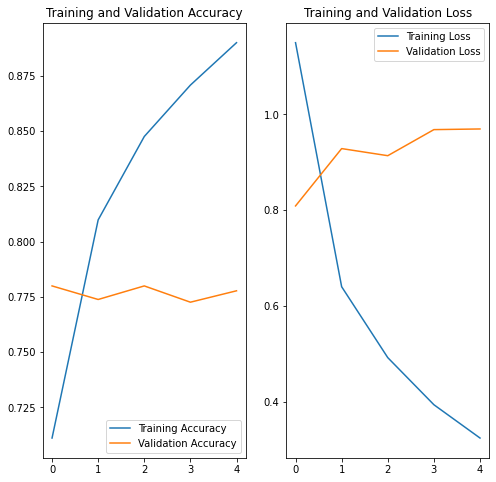

In [9]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()